# Linear models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
from string import ascii_lowercase as letters

## Make some data

In [143]:
n = 1000
p = 10

In [144]:
X = np.random.standard_normal((n,p))

In [145]:
X.shape

(1000, 10)

In [146]:
A = np.random.random((p,1))
A

array([[0.7627621 ],
       [0.58333234],
       [0.18752431],
       [0.34369263],
       [0.49871844],
       [0.84198808],
       [0.52365992],
       [0.42093045],
       [0.73591475],
       [0.33515418]])

In [147]:
y = X @ A

In [148]:
y.shape

(1000, 1)

## Too easy

In [149]:
model = LinearRegression().fit(X, y)

In [150]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
X_test = np.random.standard_normal((n,p))
y_test = X_test @ A

In [152]:
from sklearn.metrics import r2_score

In [153]:
y_pred = model.predict(X_test)

In [154]:
r2_score(y_test, y_pred)

1.0

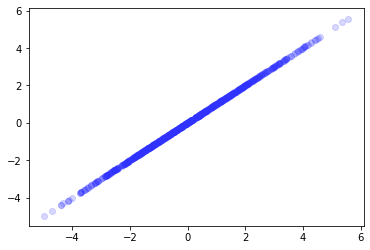

In [155]:
plt.scatter(y_test, y_pred, color='#3033ff30')
plt.show()

## Adding Noise

In [184]:
noise = 1/2

In [185]:
X_train = X + np.random.normal(loc=0, scale=noise, size=(n,p))
y_train = y + np.random.normal(loc=0, scale=noise, size=(n,1))

In [186]:
model = LinearRegression().fit(X_train, y_train)

In [187]:
X_test_noisy = X_test + np.random.normal(loc=0, scale=noise, size=(n,p))
y_test_noisy = y_test + np.random.normal(loc=0, scale=noise, size=(n,1))

In [188]:
y_pred = model.predict(X_test_noisy)

In [189]:
r2_score(y_test, y_pred)

0.7979379802270423

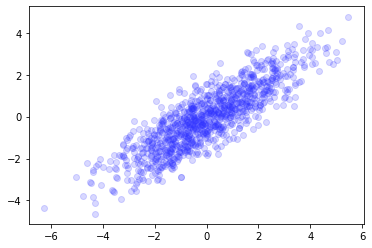

In [190]:
plt.scatter(y_test_noisy, y_pred, color='#3033ff30')
plt.show()

In [191]:
import itertools

In [192]:
def learning_curve(A, noise=1/3):
    p = A.shape[0]
    results = []

    n_train_seq = itertools.chain.from_iterable(itertools.repeat(x, 10) for x in range(20, 500, 20))
    
    for n in n_train_seq:
        X = np.random.standard_normal((n,p))
        y = X @ A

        X_train = X + np.random.normal(loc=0, scale=noise, size=(n,p))
        y_train = y + np.random.normal(loc=0, scale=noise, size=(n,1))

        model = LinearRegression().fit(X_train, y_train)

        n_test = 1000
        X_test = np.random.standard_normal((n_test,p))
        y_test = X_test @ A
        
        X_test_noisy = X_test + np.random.normal(loc=0, scale=noise, size=(n_test,p))
        y_test_noisy = y_test + np.random.normal(loc=0, scale=noise, size=(n_test,1))

        y_pred = model.predict(X_test_noisy)

        results.append((n, r2_score(y_test_noisy, y_pred)))
    return np.array(results)

In [193]:
lc = learning_curve(A, noise=1/3)

In [194]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [195]:
X_lc = lc[:,0:1]
y_lc = lc[:,1]

In [196]:
degree = 3
lc_model = make_pipeline(PolynomialFeatures(degree), Ridge())
lc_model.fit(X_lc, y=y_lc)
lc_y_plot = lc_model.predict(X_lc)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73695e-18): result may not be accurate.
  overwrite_a=True).T


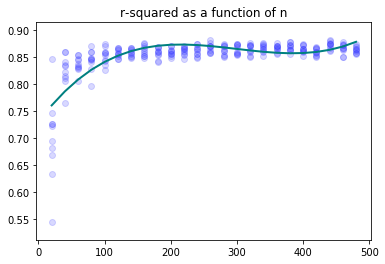

In [197]:
plt.scatter(lc[:,0], lc[:,1], color='#3033ff30')
plt.plot(lc[:,0], lc_y_plot, color='teal', linewidth=2,
         label="degree %d" % degree)
plt.title('r-squared as a function of n')
plt.show()

## Transformed features

Let's make the problem harder. Let's say there are 10 true features that are linearly related with our target variable. We don't necessarily get to observe those, but we can measure 10 other features. These might be combinations of the original features with more or less noise added. Some variable are totally hidden.

In [198]:
def tr(v, extra_noise):
    a,b,c,d,e,f,g,h,i,j = v
    super_noisy = np.random.normal(loc=0, scale=extra_noise, size=None)
    return (a+b, b*c, (c + d + e)/3, d + i/10, e, f, g+super_noisy, h + i/5, h + c/3, 0)

In [204]:
noise = 1/5
X_tr_train = np.apply_along_axis(tr, axis=1, arr=X, extra_noise=2) + np.random.normal(loc=0, scale=noise, size=(n,p))

In [205]:
model = LinearRegression().fit(X_tr_train, y_train)

In [206]:
X_tr_test = np.apply_along_axis(tr, axis=1, arr=X_test, extra_noise=1) + np.random.normal(loc=0, scale=noise, size=(n,p))

In [207]:
y_pred = model.predict(X_tr_test)

In [208]:
r2_score(y_test, y_pred)

0.7653260570662959

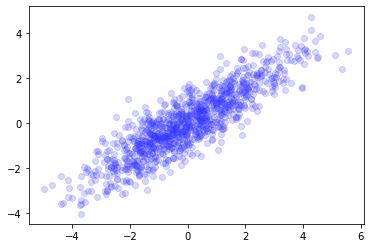

In [209]:
plt.scatter(y_test, y_pred, color='#3033ff30')
plt.show()

In [210]:
model.coef_

array([[ 0.62614604, -0.02237271,  0.69482946,  0.14686726,  0.25701165,
         0.78569729,  0.12375401,  0.99693932, -0.52202067, -0.0583846 ]])

In [211]:
A

array([[0.7627621 ],
       [0.58333234],
       [0.18752431],
       [0.34369263],
       [0.49871844],
       [0.84198808],
       [0.52365992],
       [0.42093045],
       [0.73591475],
       [0.33515418]])

In [212]:
from pandas.plotting import scatter_matrix

In [213]:
df = pd.DataFrame(X_tr_train, columns=list(letters[:10]))
df['y'] = y_train
df.shape

(1000, 11)

In [214]:
df.head()

,a,b,c,d,e,f,g,h,i,j,y
0,1.314448,0.023266,0.056421,0.746433,-0.629139,-0.092127,2.926367,2.109876,2.233163,-0.124951,0.838278
1,0.751095,1.084729,0.783532,0.907184,1.214011,0.344091,0.311413,1.455683,1.661667,0.115442,1.696325
2,-1.756378,0.686123,-0.744951,-0.142742,-0.082252,-0.059036,-1.087929,0.047697,-0.203254,-0.001232,-1.617903
3,0.507791,0.123483,0.136844,-0.434164,-0.214412,0.572227,0.598011,-1.041182,-0.908442,0.243438,-0.509589
4,0.170339,0.243127,-0.316863,-0.771154,-0.782227,-1.069955,-1.001974,0.406494,1.496509,0.078402,-3.781105


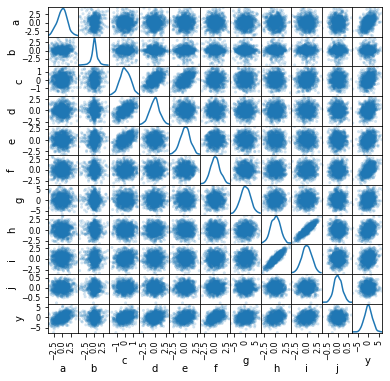

In [215]:
x = scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

In [216]:
df = pd.DataFrame(X, columns=list(letters[:10]))
df['y'] = y_train
df.shape

(1000, 11)

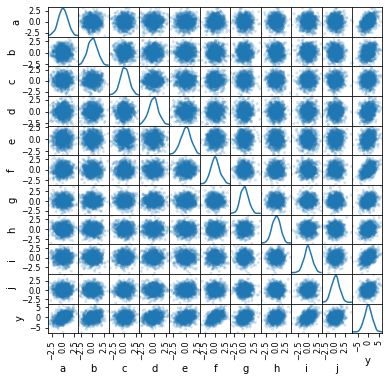

In [217]:
x = scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')